Proyecto

In [1]:
#Improtamos las librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
Tabla = pd.read_excel('medidas.xlsx') #Se utliza la libreria pandas para crear el dataframe
Tabla.head()

,wavelength,value (M1),value (M2),value (M3),value (M4),value (M5),value (M6)
0,220,2.19867,1.32533,0.69367,0.38867,0.22733,0.13433
1,221,2.19867,1.32400,0.69100,0.38667,0.22800,0.13267
2,222,2.19867,1.30900,0.68200,0.38167,0.22467,0.13000
3,223,2.19867,1.28867,0.66967,0.37433,0.21967,0.12767
4,224,2.18800,1.26400,0.65667,0.36600,0.21400,0.12533


Visualización del espectro UV del Ibuprofeno

In [3]:
AbsorbanceM1=Tabla['value (M1)']   #Seleccionamos los datos de Aborbancia de la concentración 1 en la tabla de datos
wavelength = Tabla['wavelength']  #Seleccionamos los datos de Longitud de Onda de la concentración 1 en la tabla de datos

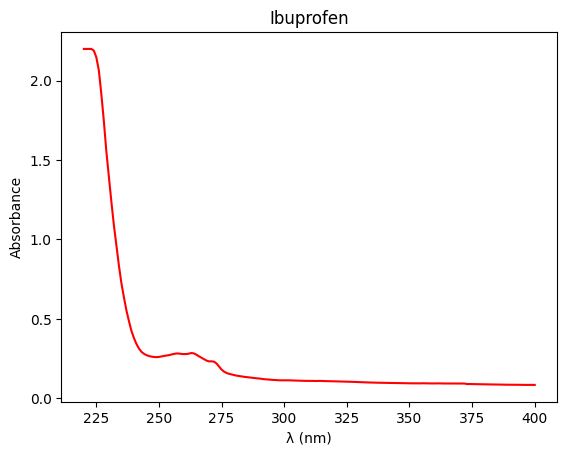

In [4]:
#Graficamos el Espectro UV del Ibuprofeno en una conentración de 0,7 mg/ml
plt.figure() 
plt.plot(wavelength, AbsorbanceM1, color='red', linestyle='solid')
plt.title('Ibuprofen')
plt.xlabel('λ (nm)')
plt.ylabel('Absorbance')
plt.show()

Cálculo de absorbancia máxima en cada concentración

In [5]:
#Seleccionamos los datos de Aborbancia de las concentraciones en la tabla de datos(AbsorbanceM2=Tabla['value (M2)'])
AbsorbanceM2=Tabla['value (M2)']
AbsorbanceM3=Tabla['value (M3)']
AbsorbanceM4=Tabla['value (M4)']
AbsorbanceM5=Tabla['value (M5)']
AbsorbanceM6=Tabla['value (M6)']
#Encontramos valores de absorbancia máximo en cada espectro de concentración
MaxAbM1= max(AbsorbanceM1)
MaxAbM2= max(AbsorbanceM2)
MaxAbM3= max(AbsorbanceM3)
MaxAbM4= max(AbsorbanceM4)
MaxAbM5= max(AbsorbanceM5)
MaxAbM6= max(AbsorbanceM6)

In [6]:
Absorbances= np.array([MaxAbM6, MaxAbM5, MaxAbM4, MaxAbM3, MaxAbM2, MaxAbM1])#Almacenamos los valores máximos de absorbancia en un arreglo
Concentrations= np.array([0.0022, 0.0044, 0.0089, 0.018, 0.036, 0.07]) #Almacenamos las concentraciones (mg/ml) tomadas en un arreglo" 

In [7]:
#Creamos el DataFrame que relaciona cada concentración con su punto máximo de absorbancia
Abosorbancemax = pd.DataFrame()
Abosorbancemax['Concentrations (mg/ml)']= Concentrations
Abosorbancemax['Absorbances']= Absorbances
Abosorbancemax

,Concentrations (mg/ml),Absorbances
0,0.0022,0.13433
1,0.0044,0.22800
2,0.0089,0.38867
3,0.0180,0.69367
4,0.0360,1.32533
5,0.0700,2.19867


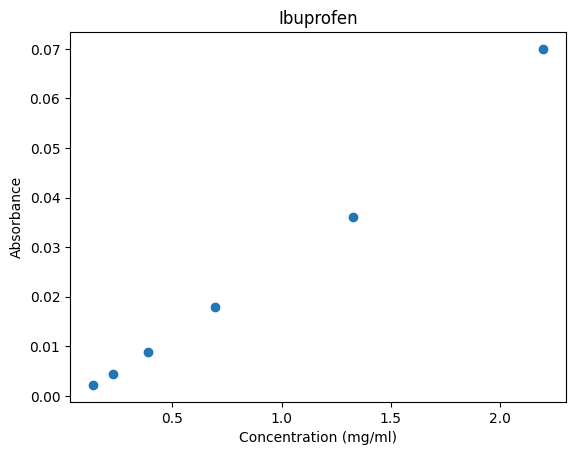

In [8]:
#Graficamos concentración vs punto máximo de absorbancia
plt.figure() 
plt.plot(Absorbances, Concentrations,"o")
plt.title('Ibuprofen')
plt.xlabel('Concentration (mg/ml)')
plt.ylabel('Absorbance')
plt.show()

Regresión Lineal

In [10]:
from sklearn.linear_model import LinearRegression #Importar libreria referente al modelo de regresión lineal

In [11]:
Concentrations= np.array([0.0022, 0.0044, 0.0089, 0.018, 0.036, 0.07]).reshape((-1,1)) #Normalizamos el arreglo de concentraciones

In [12]:
#Entrenamos el modelo con los valores de Concentración y Absorbancia
model = LinearRegression()
model.fit(Concentrations, Absorbances) 
model = LinearRegression().fit(Concentrations, Absorbances)  

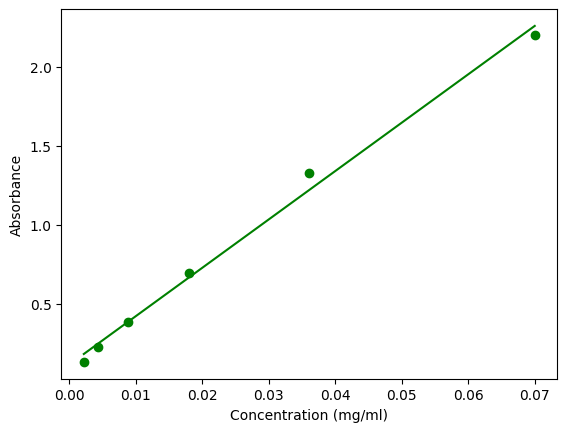

In [13]:
#Graficamos los resultados del modelo
plt.scatter(Concentrations, Absorbances,color='g')
plt.plot(Concentrations, model.predict(Concentrations),color='g')
plt.xlabel('Concentration (mg/ml)')
plt.ylabel('Absorbance')
plt.show()

In [14]:
#Métricas obtenidas del modelo
r_sq = model.score(Concentrations, Absorbances) #Coeficiente de determinación
print(f"Coeficiente de determinación: {r_sq}") 
print(f"Intercepto: {model.intercept_}") #Intercepto
print(f"Pendiente: {model.coef_}") #Pendiente

Coeficiente de determinación: 0.994098875617843
Intercepto: 0.11726643211288201
Pendiente: [30.57398858]


Con esto, obtenemos la ecuación que nos permitirá determinar la concentración de Ibuprofeno en solución por medio de Espectrofometría UV-VIS, conociendo el punto máximo de absorbancia en el espectro

Concentration (mg/ml)= (Absorbance Max - 0,12) / 3,57